# Introduction

As a publicly funded institution, police departments can often struggle with the issues that befall other government organizations: lack of funding and manpower, which in turn serves as a detriment to dynamism, efficiency and/or strategic decision-making. As a result, crime can flourish not because of insufficient police presence, but due to inefficient police presence (i.e. police are active but not making decisions strategically and therefore inhibited in their overall efficacy). This is an especially salient issue in our close-by nation’s capital, where different parts of the city have well-known (but perhaps not yet quantitatively captured) reputations and expectations about criminal activity based on anecdotal experiences.  

The primary objective of this project is to conduct an analysis of crime data in Washington D.C. in order to assist stakeholders like policymakers and police commanders in making informed decisions about strategically allocating crime-fighting resources such as public surveillance cameras, police manpower, and more. This will be completed by examining the frequency of crime incidents in different locations and at different times of the day and year. We seek to identify patterns and hotspots across various areas of the city. Through data visualization, our goal is to offer a clearer understanding of safety concerns in different parts of D.C by investigating the following research questions:  
- __Which crimes were committed the most often?__  
- __In which areas (wards) do the most crimes occur?__  
- __How does criminal activity vary at various times of the day? At various times of the year?__  

The data used for this analysis was collected as a CSV file from the Open Data DC website. The definition of the data object: the observations are records of crimes that occurred in Washington, D.C. during the year 2023, and each record includes information about timing (date and time), location (longitude, latitude, ward, neighborhood cluster, block), and how the data was recorded. These variables will allow us to conduct in-depth analysis to uncover crime patterns and trends within the city.

# Method

We began cleaning the dataset by narrowing the list of columns to the ones we wanted. The dataset contained a lot of information that was partially or entirely repetitive. For instance, the pair of columns “X” and “Y” held the exact same information as the columns “LONGITUDE” and “LATITUDE.” There were also more representations of data than we needed for our analysis. In addition to “X,” “Y,” “LONGITUDE,” and “LATITUDE,” other columns that indicated location data include “DISTRICT,” “WARD,” NEIGHBORHOOD CLUSTER,” “CENSUS TRACT,” and “VOTING PRECINCT.” Several of these columns were also indecipherable to us. For these reasons, we narrowed down the list of columns to OFFENSE, WARD, LATITUDE, LONGITUDE, DATE (formerly START_DATE) , and OBJECTID. We chose START_DATE as an indicator of timing since crimes could take some time to finish, and the time when the crime is initiated gives a better idea of what times of day might be associated with increased criminal activity.  

Our next cleaning step was to remove any rows containing null values. After narrowing the dataset down to only the necessary columns, There were only a few rows removed for having null values. Afterwards, we used regular expressions to extract the hour and month values for each record and create HOUR and MONTH columns. This was done before adjusting the datatypes of several columns because the values could not be extracted with regular expressions from datetime values, and the use of regular expressions was the advanced technique we used to meet the project’s requirements. The final cleaning step was to adjust data types to accurately reflect what kinds of variables they were representing.  

For our visualizations of crime frequency, we counted the occurrences of unique values of MONTH, WARD, and HOUR and displayed them using bar charts. We employed an effectively similar method to count the occurrences of different types of offenses, grouping by OFFENSE and counting the number of unique records. After determining that theft-related offenses, including burglary and robbery, were the most prevalent, we narrowed down the dataset to those crimes and created another visualization of frequency by ward using the same methodology. Finally, we created geographic visualizations of all occurrences of each offense type (colored by ward) to identify areas of highly and/or lowly concentrated criminal activity.

# Preprocessing

In [10]:
import pandas as pd
import geopandas
import contextily as cx
import matplotlib.pyplot as plt

In [11]:
crime_df = geopandas.read_file("data/Crime_Incidents_in_2023.geojson")

In [12]:
crime_df.head(1)

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,geometry
0,23136280,2023-08-19 05:58:34+00:00,MIDNIGHT,OTHERS,THEFT/OTHER,1216 - 1299 BLOCK OF CONNECTICUT AVENUE NW,396372.06,137666.86,2,2B,...,010700,Precinct 17,38.906853,-77.041828,GOLDEN TRIANGLE,2023-08-19 05:31:00+00:00,2023-08-19 05:42:00+00:00,495559018,None,POINT (-77.04183 38.90686)


In [14]:
crime_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34212 entries, 0 to 34211
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   CCN                   34212 non-null  object             
 1   REPORT_DAT            34212 non-null  datetime64[ns, UTC]
 2   SHIFT                 34212 non-null  object             
 3   METHOD                34212 non-null  object             
 4   OFFENSE               34212 non-null  object             
 5   BLOCK                 34212 non-null  object             
 6   XBLOCK                34212 non-null  float64            
 7   YBLOCK                34212 non-null  float64            
 8   WARD                  34207 non-null  object             
 9   ANC                   34207 non-null  object             
 10  DISTRICT              33927 non-null  object             
 11  PSA                   33914 non-null  object             
 

In [15]:
crime_df = crime_df.drop(columns=["OCTO_RECORD_ID", "BID"])
crime_df = crime_df.dropna()

In [17]:
crime_df = crime_df.rename(columns={'START_DATE': 'DATE'})

In [18]:
cols = ["OFFENSE", "WARD", "LATITUDE", "LONGITUDE", "DATE", "OBJECTID", "geometry"]
crime_df = crime_df[cols]

In [20]:
crime_df["MONTH"] = crime_df.DATE.dt.month
crime_df["HOUR"] = crime_df.DATE.dt.hour

In [21]:
crime_df["DATE"] = pd.to_datetime(crime_df["DATE"])
crime_df["WARD"] = crime_df["WARD"].astype(int)
crime_df["MONTH"] = crime_df["MONTH"].astype(int)
crime_df["HOUR"] = crime_df["HOUR"].astype(int)

# Results

*Visualization 1: Crime Frequencies by Hour*

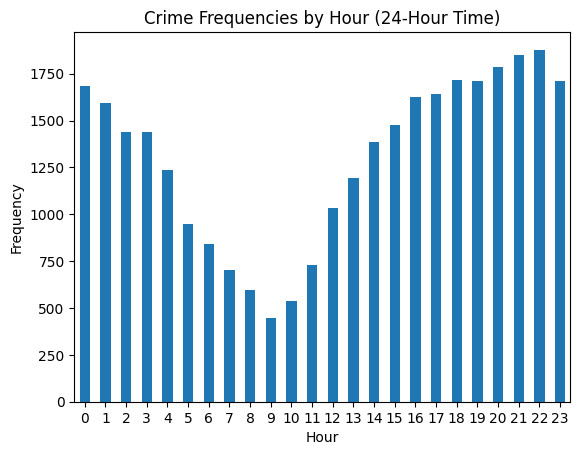

In [25]:
hour_counts = crime_df["HOUR"].value_counts()
hour_counts.sort_index().plot.bar()
plt.title("Crime Frequencies by Hour (24-Hour Time)")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

*Visualization 2: Crime Frequencies by Month*

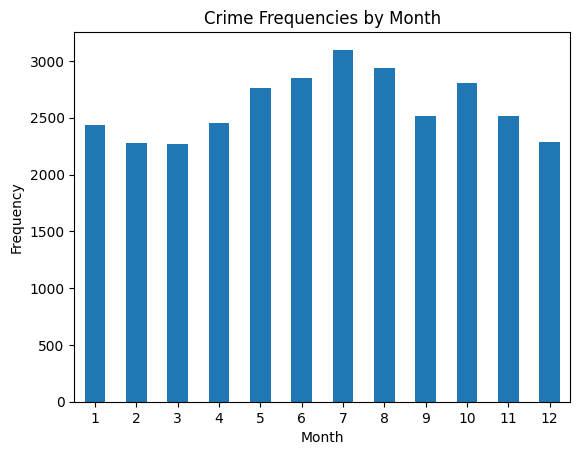

In [24]:
month_counts = crime_df["MONTH"].value_counts()
month_counts.sort_index().plot.bar()
plt.title("Crime Frequencies by Month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

*Visualization 3: Crime Frequencies by Offense Types*

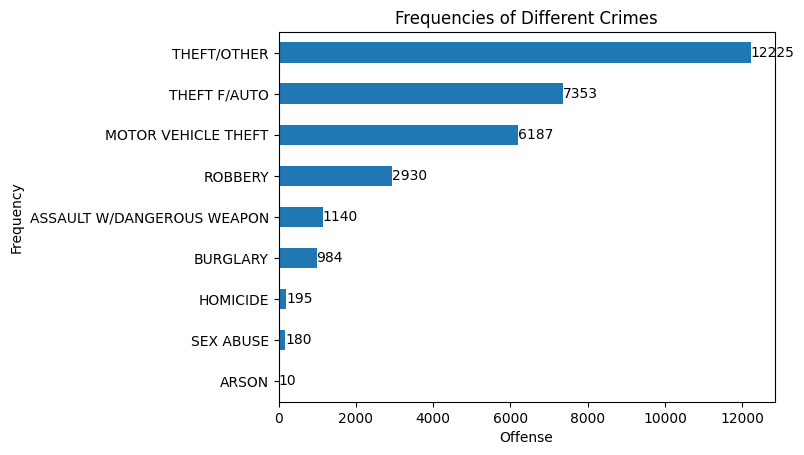

In [27]:
crime_counts = crime_df.groupby(["OFFENSE"])["OBJECTID"].count()
ax = crime_counts.sort_values(ascending=True).plot.barh()
ax.bar_label(ax.containers[0])
plt.title("Frequencies of Different Crimes")
plt.xlabel("Offense")
plt.ylabel("Frequency")
plt.show()

*Visualization 4: Geographic Plots of Different Offense Types by Ward*

In [29]:
BM = crime_df.OFFENSE.str.contains("THEFT|ROBBERY|BURGLARY", regex=True)
theft_df = crime_df[BM].copy()

In [35]:
theft_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
disp_theft_df = theft_df.to_crs(epsg=3857)

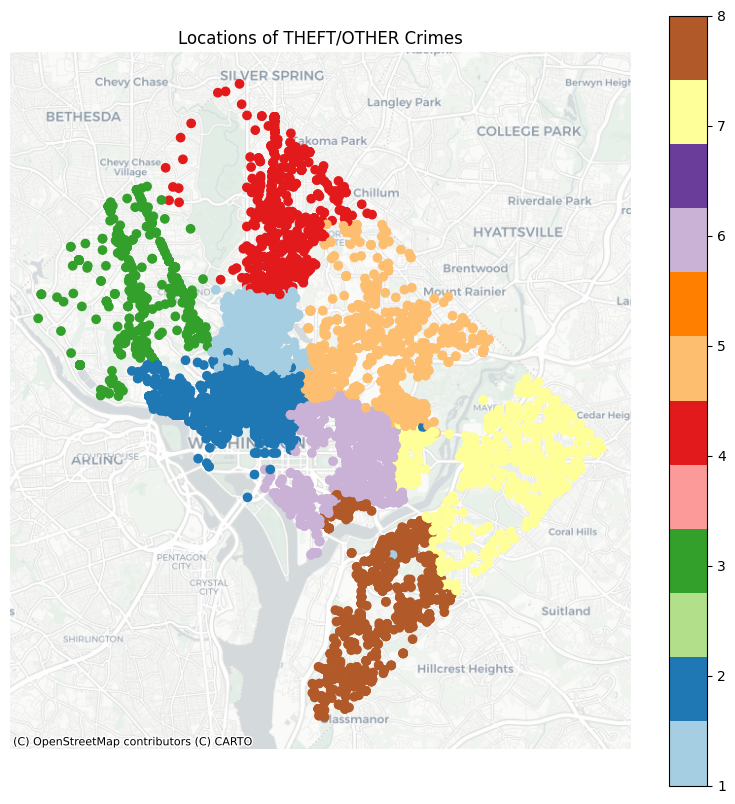

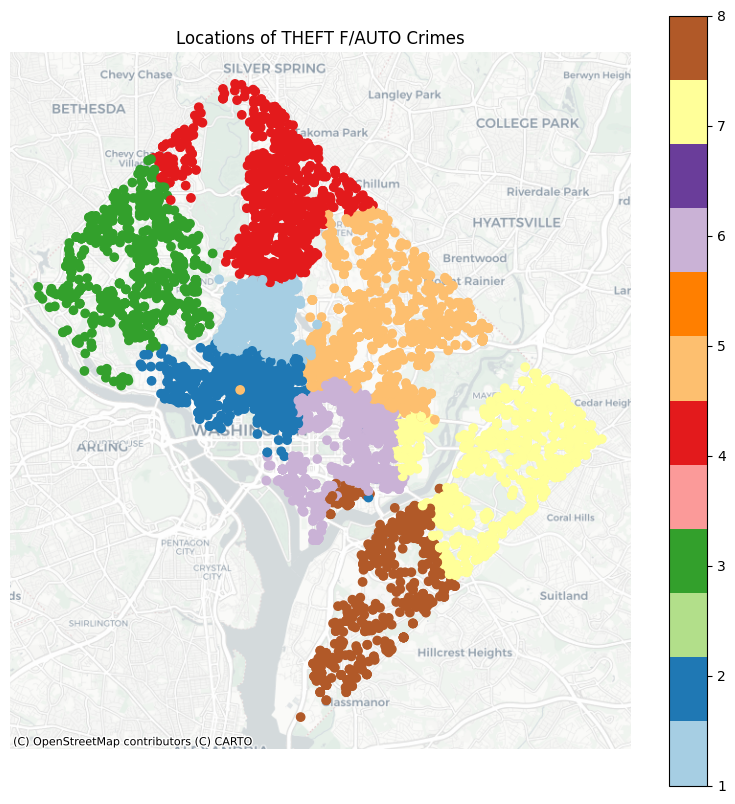

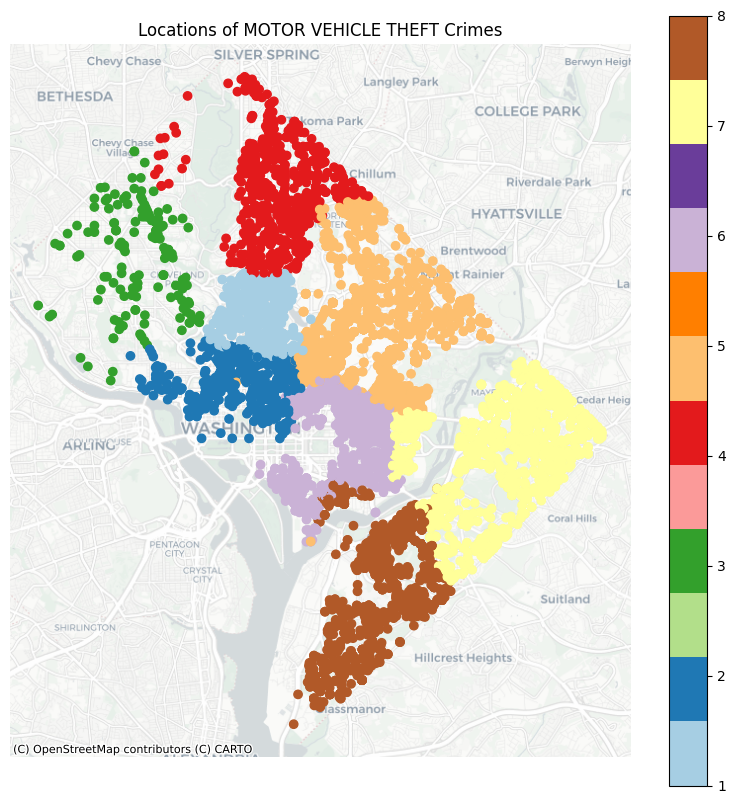

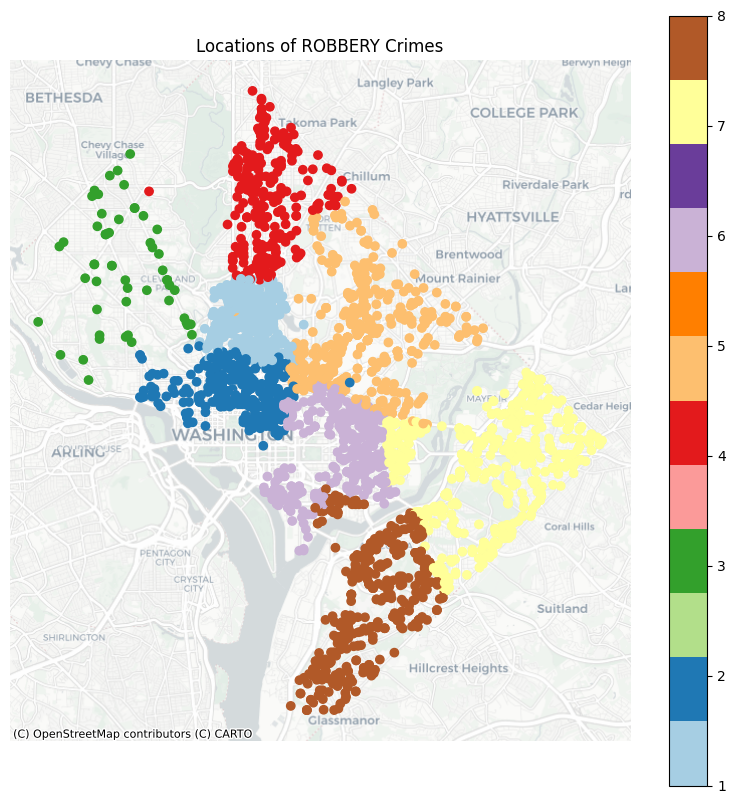

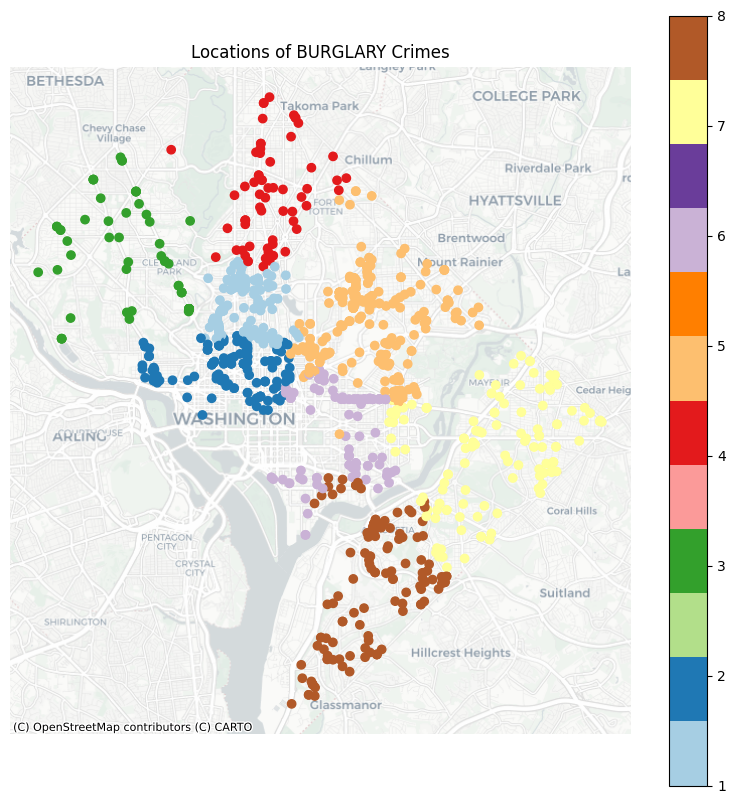

In [55]:
offense_types = disp_theft_df.OFFENSE.unique()
for off in offense_types:
    BM = disp_theft_df.OFFENSE == off
    this_disp_theft_df = disp_theft_df[BM]
    ax3 = this_disp_theft_df.plot("WARD", figsize=(10, 10), cmap="Paired", legend=True)
    cx.add_basemap(ax3, source=cx.providers.CartoDB.Positron)
    ax3.set_axis_off()
    plt.title("Locations of "+off+" Crimes")
    plt.show()

## Discussion

One of the primary objectives of our project was to empower stakeholders with the ability to make well-informed decisions regarding various aspects of the Washington D.C. metropolitan area. By providing crime patterns within the region, dissecting them by factors such as ward, time of day, and other pertinent variables. To reiterate, the three research questions we delved into are as follows:  
- __Which crimes were committed the most often?__  
- __In which areas (wards) do the most crimes occur?__  
- __How does criminal activity vary at various times of the day? At various times of the year?__

Our investigation unraveled intriguing findings, such as theft being the most commonly reported offense, totaling a staggering 12,235 incidents within our dataset. Remarkably, our visualizations revealed individuals in Washington D.C. are over ten times more likely to encounter theft than assault with a dangerous weapon. In continuation, crimes like arson emerged as nearly negligible concerns for the majority of D.C. residents, with only 10 reported cases within our analyzed timeframe. Moreover, our analysis pinpointed theft and auto theft as the most prevalent offenses—a trend that aligns with the notion that these crimes are often financially rewarding, carry relatively lower penalties compared to violent offenses, and may involve fewer risks for perpetrators compared to more confrontational crimes.    

Examining temporal trends, our analysis revealed the most heightened criminal activity during nighttime hours, particularly between 5 pm and 10 pm, a pattern that aligns with expectations due to decreased visibility and potentially reduced surveillance during these hours. Additionally, our data showcased a notable surge in crime rates during the spring and summer months, a phenomenon likely attributable to increased outdoor activities and larger gatherings during warmer weather, presenting more opportunities for criminal behavior.  

Regarding geographic distribution, certain wards, notably Wards 1, 2, and 5, emerged as hotspots for criminal activity, exhibiting higher frequencies of reported offenses compared to others. The concentration of crime within these wards suggests underlying socio-economic factors or population densities that may contribute to heightened criminal behavior. By mapping the geographical distribution of crimes, we uncovered intriguing insights, such as the high concentration of auto thefts within Ward 3. Such visualizations elucidate the spatial clustering of criminal incidents, highlighting areas where specific types of crimes are more rampant, thereby aiding in targeted law enforcement efforts and community initiatives aimed at crime prevention and intervention.

## Limitations

The dataset only covered a year’s worth of information, which presented a significant limitation in understanding long-term trends and patterns. There is a lot to take into account from criminal activity in previous years, like how variation in criminal activity may have been impacted by the changes in lifestyle caused by the COVID-19 pandemic. Aggregating datasets of criminal activity over multiple years could help us avoid being misled by outlier criminal events.  

In addition, because our data is only limited to the timing and location of various crimes, it does not consider other factors that could influence crime rates, such as terrorism, increased traffic, weather changes, or special events in the city. The lack of data on these factors made it difficult to fully account for or explain spikes or anomalies in criminal activity. This limitation is significant because it becomes magnified in the context of the aforementioned limitation of small sample size; when combining crime data over multiple years, our data becomes even more susceptible to outlier events and latent factors over longer periods of time. To address this in future work, we could employ a similar approach to that taken in the class midterm: adding columns to help quantify the effects of holidays, weekdays vs. weekends, weather, and other factors on the variable of interest (in this case, criminal activity).  

Finally, as mentioned in a previous section of this report, misorganized data posed a significant obstacle throughout the analysis, as unclear meanings, redundancy, and missing information required extensive data cleaning and restructuring. Eliminating unnecessary columns helped improve data clarity, enabling a more robust analysis. Despite these challenges, our data cleaning process resulted in clarity of presenting rich insights that effectively highlight the crime patterns in the city.

## Conclusion

In conclusion, the project has provided valuable insights to crime patterns and trends within Washington D.C., and it offers stakeholders actionable information for promoting safety and well-being in the area. To summarize, our analysis confirmed the notion that more crimes occur at night and during the warmer months of the year. Our work also revealed Washington, D.C. wards 1, 2, and 5 as hotbeds of criminal activity (especially theft-related offenses) and ward 3 as a prominent site for auto thefts.

## Data Source
- Open Data DC, City of Washington Crime Incidents in 2023 CSV  
https://opendata.dc.gov/datasets/89561a4f02ba46cca3c42333425d1b87_5/explore